# BRSM Take Home Assignment (8-03-2025)

## Submitted by - Ashish Chokhani(2021102016)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
from scipy.stats import pearsonr
import pandas as pd
from scipy import stats

### Question 1

####  Apply both Bonferroni and Benjamini-Hochberg correction and create a graph with the observed/unadjusted p-values,

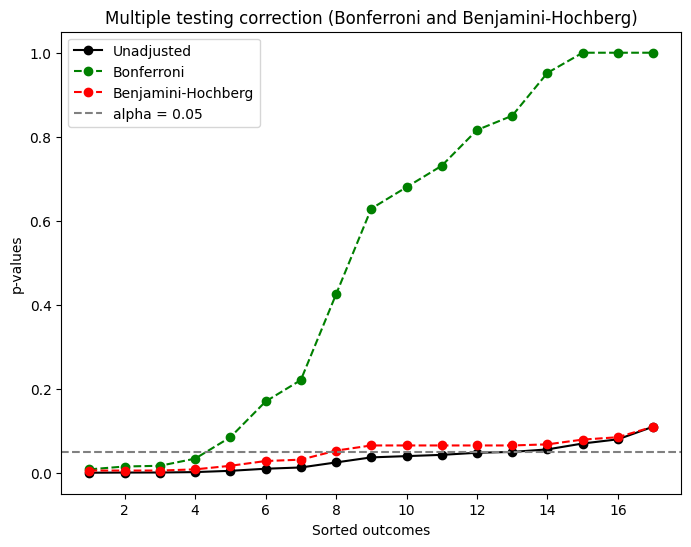

In [2]:
# Observed p-values
p_values = np.array([0.0050, 0.0010, 0.0100, 0.0005, 0.0009, 0.0400, 0.0560, 
                     0.0500, 0.0480, 0.0130, 0.0370, 0.0430, 0.0020, 0.0250, 
                     0.1100, 0.0700, 0.0800])

# Sort p-values
sorted_p_values = np.sort(p_values)

# Bonferroni correction
_, bonferroni_corrected, _, _ = multipletests(sorted_p_values, method='bonferroni')

# Benjamini-Hochberg correction
_, bh_corrected, _, _ = multipletests(sorted_p_values, method='fdr_bh')

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(sorted_p_values) + 1), sorted_p_values, 'o-', label='Unadjusted', color='black')
plt.plot(np.arange(1, len(sorted_p_values) + 1), bonferroni_corrected, 'o--', label='Bonferroni', color='green')
plt.plot(np.arange(1, len(sorted_p_values) + 1), bh_corrected, 'o--', label='Benjamini-Hochberg', color='red')

# Adding a line for alpha = 0.05
plt.axhline(y=0.05, color='gray', linestyle='--', label='alpha = 0.05')

# Labeling
plt.title('Multiple testing correction (Bonferroni and Benjamini-Hochberg)')
plt.xlabel('Sorted outcomes')
plt.ylabel('p-values')
plt.legend()

# Show plot
plt.show()

### Interpretation

- Bonferroni is more conservative because it adjusts p-values to higher values, making it harder for results to be considered significant. This reduces the risk of Type I errors (false positives) but increases the likelihood of missing true positives (more Type II errors).
- Benjamini-Hochberg is less conservative and aims for a balance by controlling the false discovery rate, which allows more tests to be significant while maintaining control over the proportion of false discoveries.

### QUESTION 2 

#### Mosquito Dataset


In [3]:
file_path = './BRSM_Results Visualization.csv'
data = pd.read_csv(file_path)

beer_group = data[data['Group'] == 'Beer']['No. of Mosquitoes']
water_group = data[data['Group'] == 'Water']['No. of Mosquitoes']

#### (a) Calculate the difference between group medians and perform a permutation test (10000 iterations) to calculate the significance of the observed statistic. Also plot a histogram displaying the bootstrap distribution.

Observed statistic (median difference): 4.0
p-value: 0.0045


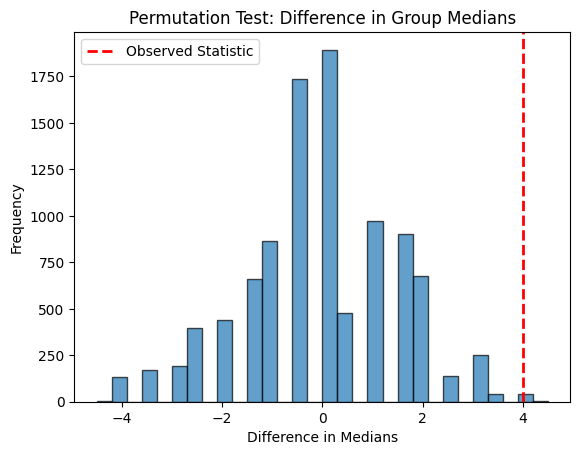

In [4]:
# Calculate observed statistic (difference in medians)
observed_statistic = np.median(beer_group) - np.median(water_group)

# Permutation test setup
n_permutations = 10000
permuted_statistics = np.zeros(n_permutations)

# Perform the permutation test
for i in range(n_permutations):
    pooled_data = np.concatenate((beer_group, water_group))  # Pool the data
    np.random.shuffle(pooled_data)  # Shuffle the pooled data
    # Split into two groups
    permuted_group1 = pooled_data[:len(beer_group)]
    permuted_group2 = pooled_data[len(beer_group):]
    # Store the permuted statistic
    permuted_statistics[i] = np.median(permuted_group1) - np.median(permuted_group2)

# Calculate p-value
p_value = np.mean(permuted_statistics >= observed_statistic)

# Output the p-value
print(f"Observed statistic (median difference): {observed_statistic}")
print(f"p-value: {p_value}")

# Plot histogram
plt.hist(permuted_statistics, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=observed_statistic, color='red', linestyle='dashed', linewidth=2, label='Observed Statistic')
plt.xlabel('Difference in Medians')
plt.ylabel('Frequency')
plt.title('Permutation Test: Difference in Group Medians')
plt.legend()
plt.show()

#### (b) Repeat step ‘a’ on the t-statistic instead of difference in medians..

Observed t-statistic: 3.5869843832143413
p-value: 0.0004


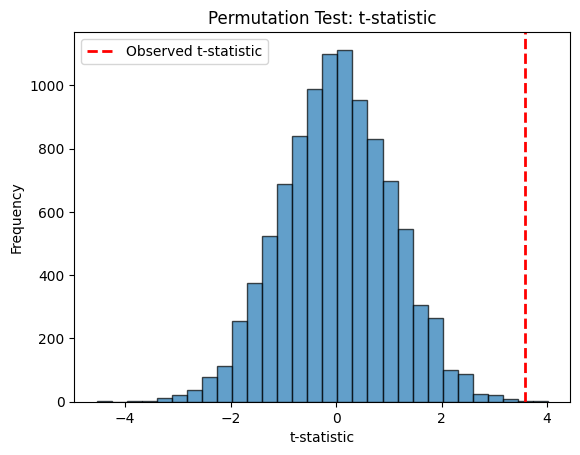

In [5]:
# Calculate the observed t-statistic
observed_t_statistic, _ = stats.ttest_ind(beer_group, water_group)

# Permutation test setup
n_permutations = 10000
permuted_t_statistics = np.zeros(n_permutations)

# Perform the permutation test
for i in range(n_permutations):
    pooled_data = np.concatenate((beer_group, water_group))  # Pool the data
    np.random.shuffle(pooled_data)  # Shuffle the pooled data
    # Split into two groups
    permuted_group1 = pooled_data[:len(beer_group)]
    permuted_group2 = pooled_data[len(beer_group):]
    # Calculate the t-statistic for the permuted groups
    permuted_t_statistic, _ = stats.ttest_ind(permuted_group1, permuted_group2)
    permuted_t_statistics[i] = permuted_t_statistic

# Calculate p-value
p_value = np.mean(permuted_t_statistics >= observed_t_statistic)

# Output the t-statistic and p-value
print(f"Observed t-statistic: {observed_t_statistic}")
print(f"p-value: {p_value}")

# Plot histogram of permuted t-statistics
plt.hist(permuted_t_statistics, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=observed_t_statistic, color='red', linestyle='dashed', linewidth=2, label='Observed t-statistic')
plt.xlabel('t-statistic')
plt.ylabel('Frequency')
plt.title('Permutation Test: t-statistic')
plt.legend()
plt.show()

#### (c) Assuming a non-directional HA (suggesting that there will be a difference in groups), calculate the new significance values of the above observed statistics.

p-value: 0.0149


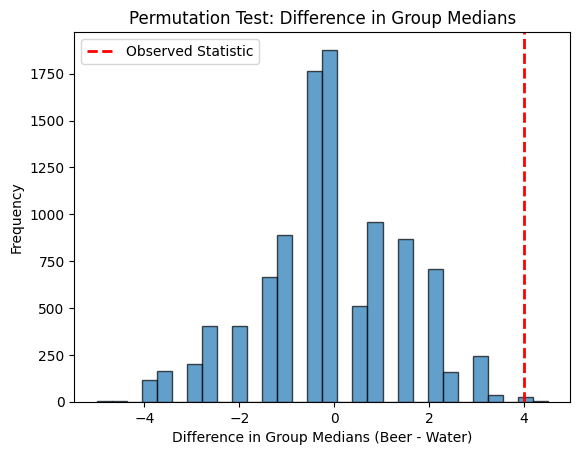

In [6]:
# Assuming beer_group and water_group are defined
observed_statistic = np.median(beer_group) - np.median(water_group)
n_permutations = 10000
permuted_statistics = np.zeros(n_permutations)

for i in range(n_permutations):
    pooled_data = np.concatenate((beer_group, water_group))
    np.random.shuffle(pooled_data)
    permuted_group1 = pooled_data[:len(beer_group)]
    permuted_group2 = pooled_data[len(beer_group):]
    permuted_statistics[i] = np.median(permuted_group1) - np.median(permuted_group2)

# Two-tailed test: absolute values of statistics
p_value = np.mean(np.abs(permuted_statistics) >= np.abs(observed_statistic))
print("p-value:", p_value)

# Plotting the permutation distribution
plt.hist(permuted_statistics, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(x=observed_statistic, color='red', linestyle='dashed', linewidth=2, label='Observed Statistic')
plt.xlabel('Difference in Group Medians (Beer - Water)')
plt.ylabel('Frequency')
plt.title('Permutation Test: Difference in Group Medians')
plt.legend()
plt.show()

### Question 3

### IQ Dataset

#### Calculate the correlation between IQ and testscores. Perform a permutation test and calculate the signiﬁcance of the observed test statistic (i.e. correlation). Use 10,000 iterations to create the bootstrap distribution of the test statistic. Based on your calculated signiﬁcance, would you reject or accept the null hypothesis that there exists no correlation between IQ and testscores?

In [7]:
file_path = './IQ.xlsx'
data = pd.read_excel(file_path)

# Use the correct column name for TESTSCORE
iq_scores = np.array(data['IQ'])
test_scores = np.array(data['TESTSCORE'])

# Calculate Pearson correlation coefficient
corr, _ = pearsonr(iq_scores, test_scores)
print("Correlation coefficient:", corr)

# Perform permutation test
num_iterations = 10000
permuted_correlations = np.zeros(num_iterations)
for i in range(num_iterations):
    shuffled_test_scores = np.random.permutation(test_scores)
    permuted_corr, _ = pearsonr(iq_scores, shuffled_test_scores)
    permuted_correlations[i] = permuted_corr

# Calculate p-value
p_value = np.mean(np.abs(permuted_correlations) >= np.abs(corr))
print("p-value:",round(p_value, 3))

# Test the null hypothesis
if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Accept the null hypothesis.")


Correlation coefficient: 0.4931479069133801
p-value: 0.0
Reject the null hypothesis.


##### The null hypothesis is rejected. This means that there is a significant correlation between IQ and test scores.